In [2]:
import pandas as pd
d=pd.read_csv('Dataset/car_data.csv')

In [3]:
d.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
d.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
d.shape

(301, 9)

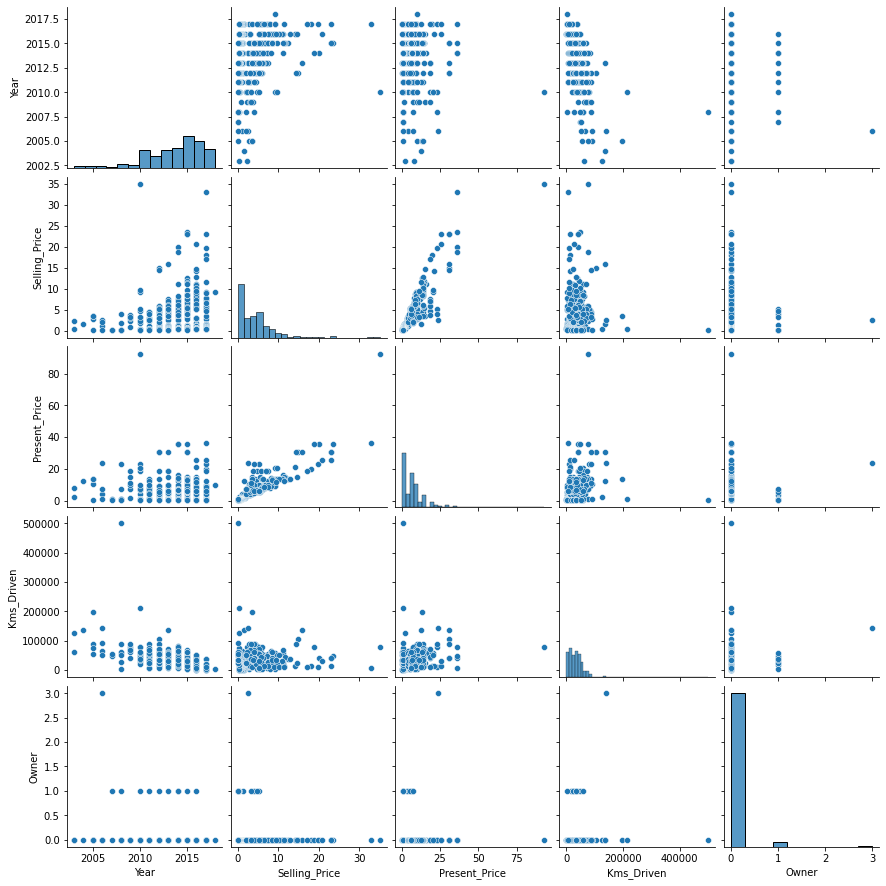

In [7]:
import seaborn as sns
sns.pairplot(d)

In [8]:
d.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [10]:
d.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
d.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [14]:
print(d.Fuel_Type.value_counts())
print(d.Seller_Type.value_counts())
print(d.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [15]:
#Replacing string data into numerical
d.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

d.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

d.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

d.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
# X= Train data
# Y= Test data

X=d.drop(['Car_Name','Selling_Price'],axis=1)
Y=d.Selling_Price

In [17]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_Train,Y_Train)

LinearRegression()

In [19]:
model.score(X_Test,Y_Test)*100

84.01532365378522

In [25]:
import numpy as np
inp=[2014,5.59,50000,1,1,0,0]
inp=np.array(inp).reshape(1,-1)
print("{:.2f}/- lakhs".format(model.predict(inp)[0]))

4.49/- lakhs


C:\Users\Anirudh PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
import pickle as pkl
filename='car_model.sav'
pkl.dump(model,open(filename,'bw'))
print('Model Saved as {}'.format(filename))

Model Saved as car_model.sav
